In [5]:
import pandas as pd
import os
import numpy as np
import random

In [8]:
os.getcwd()
os.chdir('C:/Users/Alvin F/Downloads/Practical_sheet2_submission/Practical_sheet2_submission/source_code')
os.listdir()

['.ipynb_checkpoints',
 'Cleantext.py',
 'coba.csv',
 'coba1.csv',
 'Comments.csv',
 'Comments1.csv',
 'concat.csv',
 'concat1.csv',
 'count.csv',
 'doppel.csv',
 'Features.csv',
 'Features11.csv',
 'Features_Extraction.csv',
 'Features_Valuev1.csv',
 'Joined.csv',
 'Joinedv1.csv',
 'Joined_1.csv',
 'Joined_v2.csv',
 'models',
 'newComm.csv',
 'New_Comments.csv',
 'new_dataset.csv',
 'New_Datasets2.csv',
 'New__datasets.csv',
 'New__datasets2.csv',
 'part2_task1.py',
 'part2_task2.py',
 'part2_task3.py',
 'Part4 - Copy',
 'Pca.csv',
 'PCA_DATA.csv',
 'results.csv',
 'results1.csv',
 'results2.csv',
 'results3.csv',
 'results4.csv',
 'results5.csv',
 'results6.csv',
 'results7.csv',
 'results8.csv',
 'resultss.csv',
 'result_20_20.csv',
 'result_20_20_incl_euclid.csv',
 'result_40_20.csv',
 'result_40_20_incl_euclid.csv',
 'result_60_10.csv',
 'result_60_10_incl_euclid.csv',
 'result_60_20.csv',
 'result_60_20_incl_euclid.csv',
 'result_60_30.csv',
 'result_60_30_incl_euclid.csv',
 'sor

Please enter the threshold (0-1): 0.002
--------------------------------------------------------------------------------
Doppelganger Classification Score With 20 Users & 20 Comments : 1.0
Euclidean Classification Score With 20 Users & 20 Comments : 1.0
--------------------------------------------------------------------------------

Doppelganger Classification Score With 40 Users & 20 Comments : 0.9935897435897436
Euclidean Classification Score With 40 Users & 20 Comments : 1.0
--------------------------------------------------------------------------------

Doppelganger Classification Score With 60 Users & 20 Comments : 1.0
Euclidean Classification Score With 60 Users & 20 Comments : 1.0
--------------------------------------------------------------------------------

Doppelganger Classification Score With 60 Users & 10 Comments : 1.0
Euclidean Classification Score With 60 Users & 10 Comments : 1.0
--------------------------------------------------------------------------------

Dopp

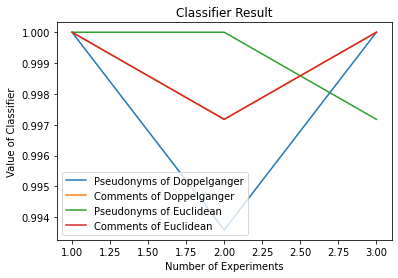

In [11]:
from scipy.spatial.distance import euclidean
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Create a list for the classification score
Doppelganger = []
Doppelganger1 = []
Euclidean = []
Euclidean1 = []


# get threshold as an input
while True:
    threshold = input("Please enter the threshold (0-1): ")

    # check the input parameter is number or not. If parameter is not number, make user input threshold again
    try:
        threshold = int(threshold)
        break
    except ValueError:
        try:
            threshold = float(threshold)
            break
        except ValueError:
            print("This is not a number. Please enter a valid number")


# Function for calculating with Euclidean Distance and append result to csv file
def euclidDoppel(outfile):
    dataset = pd.read_csv(outfile)

    nameOfFile_index = outfile.find('.csv')
    nameOfFile = outfile[:nameOfFile_index]

    probAB = dataset['P(A->B)']
    probBA = dataset['P(B->A)']

    probAB_arr = probAB.to_numpy()
    probBA_arr = probBA.to_numpy()

    distList = []

    # Calculating Euclidean distance between two users of all users
    for a, b in zip(probAB_arr, probBA_arr):
        dist = euclidean(a, b)
        distList.append(dist)

    dataset['Euclidean Distance'] = distList
    dataset['Euclidean Doppelgangers'] = dataset['Euclidean Distance'].apply(lambda d: 1 if d < threshold else 0)

    return dataset.to_csv(nameOfFile+"_incl_euclid.csv", index=False)


# Function for calculating the Euclidean score
def predict_score(df):
    data = pd.read_csv(df)

    X = data.drop(['Doppelgangers', 'Author 1', 'Author 2', 'Euclidean Doppelgangers', 'Encode 1', 'Encode 2'], axis=1)
    y = data['Euclidean Doppelgangers']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    clf = RandomForestClassifier(n_estimators=40)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)

    return score


#Function for calculating Doppelganger score
def doppelganger_score(df):
    data = pd.read_csv(df)

    X = data.drop(['Doppelgangers', 'Author 1', 'Author 2', 'Encode 1', 'Encode 2'], axis=1)
    y = data['Doppelgangers']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    clf = RandomForestClassifier(n_estimators=40)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)

    return score


# append Euclidean distance values (Unsupervised)
euclidDoppel("result_20_20.csv")
euclidDoppel("result_40_20.csv")
euclidDoppel("result_60_20.csv")
euclidDoppel("result_60_10.csv")
euclidDoppel("result_60_30.csv")

print('-'*80)
print('Doppelganger Classification Score With 20 Users & 20 Comments :', doppelganger_score('result_20_20.csv'))
print('Euclidean Classification Score With 20 Users & 20 Comments :', predict_score('result_20_20_incl_euclid.csv'))
print('-'*80)

print('\nDoppelganger Classification Score With 40 Users & 20 Comments :', doppelganger_score('result_40_20.csv'))
print('Euclidean Classification Score With 40 Users & 20 Comments :', predict_score('result_40_20_incl_euclid.csv'))
print('-'*80)

print('\nDoppelganger Classification Score With 60 Users & 20 Comments :', doppelganger_score('result_60_20.csv'))
print('Euclidean Classification Score With 60 Users & 20 Comments :', predict_score('result_60_20_incl_euclid.csv'))
print('-'*80)

print('\nDoppelganger Classification Score With 60 Users & 10 Comments :', doppelganger_score('result_60_10.csv'))
print('Euclidean Classification Score With 60 Users & 10 Comments :', predict_score('result_60_10_incl_euclid.csv'))
print('-'*80)

print('\nDoppelganger Classification Score With 60 Users & 20 Comments :', doppelganger_score('result_60_20.csv'))
print('Euclidean Classification Score With 60 Users & 20 Comments :', predict_score('result_60_20_incl_euclid.csv'))
print('-'*80)

print('\nDoppelganger Classification Score With 60 Users & 30 Comments :', doppelganger_score('result_60_30.csv'))
print('Euclidean Classification Score With 60 Users & 30 Comments :', predict_score('result_60_30_incl_euclid.csv'))


# append the scores to the doppelganger list (User per Comment)
Doppelganger.append(doppelganger_score('result_20_20.csv'))
Doppelganger.append(doppelganger_score('result_40_20.csv'))
Doppelganger.append(doppelganger_score('result_60_20.csv'))

# append the scores to the doppelganger list (Comment per User)
Doppelganger1.append(doppelganger_score('result_60_10.csv'))
Doppelganger1.append(doppelganger_score('result_60_20.csv'))
Doppelganger1.append(doppelganger_score('result_60_30.csv'))

# append the scores to the Euclidean list (User per Comment)
Euclidean.append(predict_score('result_20_20_incl_euclid.csv'))
Euclidean.append(predict_score('result_40_20_incl_euclid.csv'))
Euclidean.append(predict_score('result_60_20_incl_euclid.csv'))

# append the scores to the Euclidean list (Comment per User)
Euclidean1.append(predict_score('result_60_10_incl_euclid.csv'))
Euclidean1.append(predict_score('result_60_20_incl_euclid.csv'))
Euclidean1.append(predict_score('result_60_30_incl_euclid.csv'))

# Creating a plot for the classifier's score
x = [1,2,3]

plt.plot(x, Doppelganger, label='Pseudonyms of Doppelganger')
plt.plot(x, Doppelganger1, label='Comments of Doppelganger')
plt.plot(x, Euclidean, label='Pseudonyms of Euclidean')
plt.plot(x, Euclidean1, label='Comments of Euclidean')

plt.xlabel('Number of Experiments')
plt.ylabel('Value of Classifier')

plt.title("Classifier Result")
plt.legend()

plt.show()


In [10]:
pd.read_csv('result_20_20.csv')

,Author 1,Author 2,P(A->B),P(B->A),Multiplication,Averaged,Squared,Encode 1,Encode 2,Threshold,Doppelgangers
0,Ariovistvs,JuJuMila,0.077661,0.072341,0.005618,0.075001,0.005632,0,1,0.028750,1
1,Ariovistvs,Jordanes,0.055179,0.078782,0.004347,0.066980,0.004626,0,2,0.025318,1
2,Ariovistvs,CETAoderGoodByeGermany,0.027739,0.024653,0.000684,0.026196,0.000689,0,3,0.009189,0
3,Ariovistvs,Felyxorez,0.041171,0.034866,0.001435,0.038019,0.001455,0,4,0.013636,0
4,Ariovistvs,Bernd Sch,0.046186,0.029871,0.001380,0.038028,0.001513,0,5,0.013640,0
...,...,...,...,...,...,...,...,...,...,...,...
185,Loiseau,Lucy Meineke,0.011595,0.055331,0.000642,0.033463,0.001598,16,18,0.011901,0
186,Loiseau,Jan Reiter,0.036805,0.050187,0.001847,0.043496,0.001937,16,19,0.015760,0
187,Lea Paul,Lucy Meineke,0.008991,0.008652,0.000078,0.008821,0.000078,17,18,0.002992,0
188,Lea Paul,Jan Reiter,0.041114,0.045449,0.001869,0.043281,0.001878,17,19,0.015676,0


In [ ]:
import pandas as pd
import os
import numpy as np
import random

In [ ]:
def split_user(matrix):
    matrices = np.split(matrix, np.where(np.diff(matrix[:, -1]))[0] + 1)
    for m in matrices:
        np.random.shuffle(m)
        A = set()
        B = set()
        i = 0
        for row in m:
            if i%2 == 1:
                row[-1] = float("1" + str(row[-1]))
            else:
                row[-1] = float("2" + str(row[-1]))
            i += 1
#             if row [-3] in A:
                
#                 row[-1] = float ("1" + str(row[-1]))
#             elif row [-3] in B:
#                 row[-1] = float ("2" + str(row[-1]))
#             else:
#                 k = random.randint(0,1)
#                 if k == 0:
#                     row[-1] = float ("1" + str(row[-1]))
#                     A.add(row[-3])
#                 else:
#                     row[-1] = float ("2" + str(row[-1]))
#                     B.add(row[-3])
        abc = pd.DataFrame(matrix)
    return abc

In [ ]:
def split_random(matrix):
    matrices = np.split(matrix, np.where(np.diff(matrix[:, -1]))[0] + 1)
    for m in matrices:
        print("M \n",m)
        print("MMM", np.random.shuffle(m))
        A = set()
        B = set()
        i = 0
        for row in m:
            if i%2 == 1:
                row[-1] = float(str(row[-1])+ "1" )
            else:
                row[-1] = float(str(row[-1]) + "2" )
            i += 1
#             if row [-3] in A:
#                 print(row [-3])
#                 row[-1] = float ("1" + str(row[-1]))
#             elif row [-3] in B:
#                 row[-1] = float ("2" + str(row[-1]))
#             else:
#                 k = random.randint(0,1)
#                 if k == 0:
#                     row[-1] = float ("1" + str(row[-1]))
#                     A.add(row[-3])
#                 else:
#                     row[-1] = float ("2" + str(row[-1]))
#                     B.add(row[-3])
#         print ("A", A)
#         print("B", B)
    return matrix